我们如何能通过经纬度逆推地理位置呢？此时我们需要使用到百度地图的逆地理编码工具：

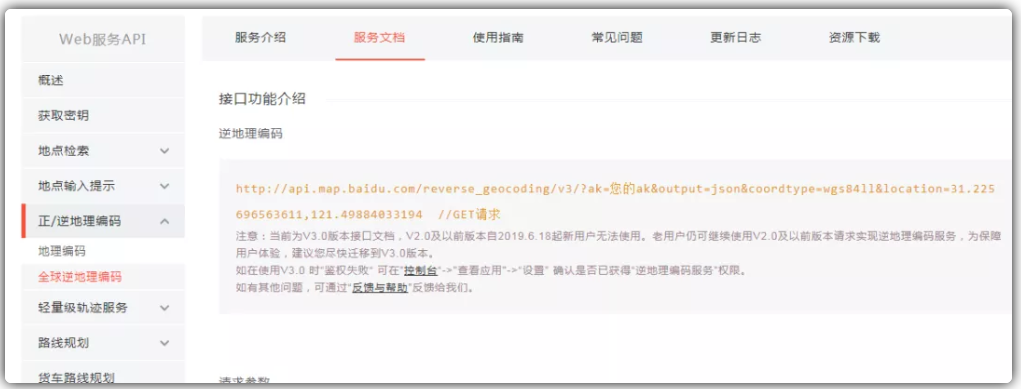

接口很简单，我们简单注册后，创建一个针对地理位置解析的应用即可：

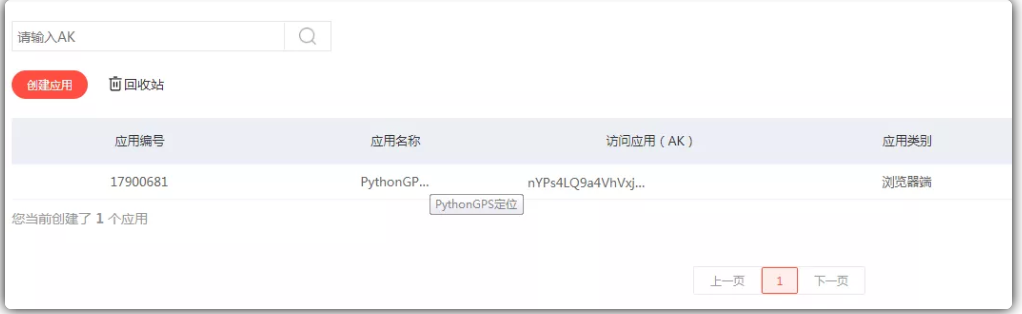

In [3]:
import requests
# 常见的图片中包含了exif信息，我们可以根据exif信息读取GPS坐标、摄像机类型、摄像头信息等
import exifread

In [5]:
class GetPhotoInfo:
    def __init__(self, photo):
        self.photo = photo
        # 百度地图ak
        self.ak = 'nYPs4LQ9a4VhVxj55AD69K6zgsRy9o4z'
        self.location = self.get_photo_info()

    def get_photo_info(self, ):
        with open(self.photo, 'rb') as f:
            tags = exifread.process_file(f)
        try:
            # 打印照片其中一些信息
            print('拍摄时间：', tags['EXIF DateTimeOriginal'])
            print('照相机制造商：', tags['Image Make'])
            print('照相机型号：', tags['Image Model'])
            print('照片尺寸：', tags['EXIF ExifImageWidth'], tags['EXIF ExifImageLength'])
            # 纬度
            lat_ref = tags["GPS GPSLatitudeRef"].printable
            lat = tags["GPS GPSLatitude"].printable[1:-1].replace(" ", "").replace("/", ",").split(",")
            lat = float(lat[0]) + float(lat[1]) / 60 + float(lat[2]) / float(lat[3]) / 3600
            if lat_ref != "N":
                lat = lat * (-1)
            # 经度
           # string.printable :包含所有可打印字符的字符串
            lon_ref = tags["GPS GPSLongitudeRef"].printable
            lon = tags["GPS GPSLongitude"].printable[1:-1].replace(" ", "").replace("/", ",").split(",")
            lon = float(lon[0]) + float(lon[1]) / 60 + float(lon[2]) / float(lon[3]) / 3600
            if lon_ref != "E":
                lon = lon * (-1)
        except KeyError:
            return "ERROR:请确保照片包含经纬度等EXIF信息。"
        else:
            print("经纬度：", lat, lon)
            return lat, lon

    def get_location(self):
        url = 'http://api.map.baidu.com/reverse_geocoding/v3/?ak={}&output=json' \
              '&coordtype=wgs84ll&location={},{}'.format(self.ak, *self.location)
        response = requests.get(url).json()
        status = response['status']
        if status == 0:
            address = response['result']['formatted_address']
            print('详细地址：', address)
        else:
            print('baidu_map error')

In [7]:
if __name__ == '__main__':
    Main = GetPhotoInfo('234.jpg')
    Main.get_location()

拍摄时间： 2019:12:06 22:01:45
照相机制造商： Xiaomi
照相机型号： MI 9
照片尺寸： 4000 3000
经纬度： 31.14670597222222 121.42100997222222
详细地址： 上海市徐汇区东隅路
